<a href="https://colab.research.google.com/github/leeminq1/python_ai_colab/blob/main/5_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Keras: a library for deep learning (the easiest)


https://keras.io/api/

In [2]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

### MLP (multi-layer perceptron, fully-connected)
#### - regression, classification

### 1. Regression
#### - use the last score as prediction score
#### - Boston housing price dataset (regression)


In [3]:
## Dataset load (https://keras.io/api/datasets/boston_housing/)
(X_train, y_train), (X_test, y_test) =keras.datasets.boston_housing.load_data(
    path="boston_housing.npz", test_split=0.2, seed=113
)


65536/57026 [==================================] - 0s 0us/step


In [5]:
## data shape
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


In [7]:
## Data sample
y_train[0]


15.2

In [8]:
## Model (https://keras.io/guides/sequential_model/)
model = keras.Sequential(
    [
        layers.Dense(6, activation="relu", name="layer1",input_dim=13),
        layers.Dense(3, activation="relu", name="layer2"),
        layers.Dense(1,name="layer3"),
    ]
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 6)                 84        
                                                                 
 layer2 (Dense)              (None, 3)                 21        
                                                                 
 layer3 (Dense)              (None, 1)                 4         
                                                                 
Total params: 109
Trainable params: 109
Non-trainable params: 0
_________________________________________________________________


In [10]:
## Train (https://keras.io/api/models/model_training_apis/)
batch_size = 16 
epochs = 200

## compile
# 러닝 rate / loss / optimaizer 머 쓸건지 정함
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3),
              loss=keras.losses.MeanSquaredError())

## fit
model.fit(x=X_train,y=y_train,batch_size=batch_size,epochs=epochs,validation_split=0.1)


Epoch 1/200
23/23 [==============================] - 3s 11ms/step - loss: 589.8611 - val_loss: 490.6507
Epoch 2/200
23/23 [==============================] - 0s 4ms/step - loss: 517.2059 - val_loss: 444.1240
Epoch 3/200
23/23 [==============================] - 0s 5ms/step - loss: 423.1861 - val_loss: 233.4456
Epoch 4/200
23/23 [==============================] - 0s 5ms/step - loss: 266.3398 - val_loss: 111.2544
Epoch 5/200
23/23 [==============================] - 0s 5ms/step - loss: 182.0485 - val_loss: 69.6169
Epoch 6/200
23/23 [==============================] - 0s 4ms/step - loss: 139.6757 - val_loss: 60.8821
Epoch 7/200
23/23 [==============================] - 0s 4ms/step - loss: 121.5915 - val_loss: 57.0223
Epoch 8/200
23/23 [==============================] - 0s 5ms/step - loss: 111.9341 - val_loss: 56.8944
Epoch 9/200
23/23 [==============================] - 0s 5ms/step - loss: 105.1487 - val_loss: 49.1824
Epoch 10/200
23/23 [==============================] - 0s 5ms/step - loss: 98.

In [11]:
## evaluate on the test set.(https://keras.io/api/models/model_training_apis/)
model.evaluate(
    x=X_test,
    y=y_test,
    verbose=1
)

4/4 [==============================] - 0s 4ms/step - loss: 27.1917


27.191665649414062

In [13]:
## prediction on new sample (https://keras.io/api/models/model_training_apis/)

model.predict(X_test[0].reshape(-1,13))

array([[6.581277]], dtype=float32)

### 2. Classification
#### - use softmax layer at the end of network to produce "probability".

#### - MNIST dataset
#### - images of numbers (0~9) -> classification

In [11]:
## Download MNIST dataset (https://keras.io/api/datasets/mnist/)
(X_train, y_train), (X_test, y_test) =keras.datasets.mnist.load_data(path="mnist.npz")


In [12]:
# shape
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [13]:
# Change the shape of data from (W, W) to (W*W, )
X_train = X_train.reshape((-1, 28*28))
X_test = X_test.reshape((-1, 28*28))

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [7]:
# from matplotlib import pyplot as plt
# plt.figure()
# plt.imshow(X_train[0])
# plt.show()

In [14]:
# convert class vectors to binary class matrices (google it!: https://www.educative.io/edpresso/how-to-perform-one-hot-encoding-using-keras)
# output shape 맞춰줌
# 현재는 output에 숫자 1 / 2 /3 이런식으로 들어가 있는데, output 0,1 인 ont hot vector 로 바꿔줘야한다.
# y_train[0]=5 인 것을 [0,0,0,0,1,0,0] 이런식으로 바꿔줌
# from keras.utils import to_categorical
# 총 label이 10개이므로, 10으로 변경해줌
y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test,10)

print(y_train.shape)
print(y_train[0])

(60000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [15]:
## Model (https://keras.io/guides/sequential_model/)
model = keras.Sequential(
    [
        layers.Dense(200, activation="relu", name="layer1",input_dim=784),
        layers.Dense(100, activation="relu", name="layer2"),
        layers.Dense(10,activation="softmax",name="layer3"),
    ]
)
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 200)               157000    
                                                                 
 layer2 (Dense)              (None, 100)               20100     
                                                                 
 layer3 (Dense)              (None, 10)                1010      
                                                                 
Total params: 178,110
Trainable params: 178,110
Non-trainable params: 0
_________________________________________________________________


In [16]:
## Train (https://keras.io/api/models/model_training_apis/)
batch_size = 64
epochs = 50

## compile
# 러닝 rate / loss / optimaizer 머 쓸건지 정함
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy']) # keras.losses.MeanSq
## fit
hist = model.fit(x=X_train, y=y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/50
844/844 [==============================] - 5s 3ms/step - loss: 2.3693 - accuracy: 0.8734 - val_loss: 0.4439 - val_accuracy: 0.9195
Epoch 2/50
844/844 [==============================] - 2s 3ms/step - loss: 0.3343 - accuracy: 0.9318 - val_loss: 0.2799 - val_accuracy: 0.9388
Epoch 3/50
844/844 [==============================] - 3s 3ms/step - loss: 0.2075 - accuracy: 0.9485 - val_loss: 0.2187 - val_accuracy: 0.9513
Epoch 4/50
844/844 [==============================] - 3s 3ms/step - loss: 0.1565 - accuracy: 0.9578 - val_loss: 0.1793 - val_accuracy: 0.9573
Epoch 5/50
844/844 [==============================] - 2s 3ms/step - loss: 0.1374 - accuracy: 0.9615 - val_loss: 0.1972 - val_accuracy: 0.9562
Epoch 6/50
844/844 [==============================] - 2s 3ms/step - loss: 0.1246 - accuracy: 0.9649 - val_loss: 0.1808 - val_accuracy: 0.9545
Epoch 7/50
844/844 [==============================] - 2s 3ms/step - loss: 0.1180 - accuracy: 0.9667 - val_loss: 0.1456 - val_accuracy: 0.9630
Epoch 

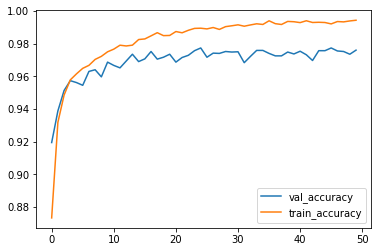

In [22]:
## plot loss and accuracy to check if the model is converged.
# plot을 위해 hist에 저장하여 plot 한다.
val_accuracy = hist.history['val_accuracy']
train_accuracy = hist.history['accuracy']

# x축을 epochs
from matplotlib import pyplot as plt
plt.figure()
plt.plot(np.arange(epochs),val_accuracy,label="val_accuracy")
plt.plot(np.arange(epochs),train_accuracy,label="train_accuracy")
plt.legend()
plt.show()

In [23]:
## evaluate on the test set
## you should get acc higher than 0.96
model.evaluate(X_test,y_test,verbose=1)


313/313 [==============================] - 1s 3ms/step - loss: 0.2385 - accuracy: 0.9771


[0.2385353446006775, 0.9771000146865845]

In [ ]:
## predict


### 3. Input Normalization
#### - Make the input features normalized
#### - why? - weight initialization


#### - Usually adopt z-score (standard score)
#### -> z = (x-μ)/σ

## Classification

In [24]:
## Download MNIST dataset
(X_train, y_train), (X_test, y_test) =keras.datasets.mnist.load_data(path="mnist.npz")

In [25]:
# Change the shape of data from (W, W) to (W*W, )
X_train = X_train.reshape((-1, 28*28))
X_test = X_test.reshape((-1, 28*28))

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 784)
(10000, 784)
(60000,)
(10000,)


In [26]:
# calculate the sample mean and std
mu = X_train.mean()
sig = X_train.std()+0.000000001

# normalize (z-score)
X_train = (X_train - mu) / sig
print(X_train[0])

# train set과 동일한 평균과 표준편차로 test_set도 변경해줘야한다.

X_test = (X_test - mu) / sig # note! : use the same statistic with the training set!

[-0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0

In [ ]:
# convert class vectors to binary class matrices


In [ ]:
## Model


In [ ]:
## Train


In [ ]:
## evaluate on the test set
## you should get acc higher than 0.97
